In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv('Samsung_Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [4]:
data = data[data.iloc[:, -1] != 0]

In [5]:
data.shape

(6000, 7)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale =data.columns.drop('Date')
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [7]:
split_point = int(len(data) * 0.8)
train, test = data[:split_point], data[split_point:]

In [8]:
model = auto_arima(train['Close'], start_p=1, start_q=1,
                   test='adf',       # sử dụng ADF test để xác định d
                   max_p=10, max_q=10, # giới hạn tối đa của p và q
                   m=1,              # tần suất chu kỳ của dữ liệu
                   d=None,           # để auto_arima quyết định d
                   seasonal=False,   # không có tính mùa vụ
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-38191.049, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-38206.036, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-38207.104, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-38207.344, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-38206.044, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-38216.290, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-38235.408, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-38236.731, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-38200.035, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-38236.262, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-38236.362, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-38238.372, Time=0.77 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-38234.515, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-38236.261, Time=2.06 sec
 ARIM

In [9]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4800
Model:               SARIMAX(1, 1, 3)   Log Likelihood               19125.186
Date:                Thu, 22 Aug 2024   AIC                         -38238.372
Time:                        21:05:41   BIC                         -38199.515
Sample:                             0   HQIC                        -38224.725
                               - 4800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.701e-05   3.12e-05      1.508      0.131   -1.41e-05       0.000
ar.L1          0.4587      0.104      4.429      0.000       0.256       0.662
ma.L1         -0.4377      0.104     -4.212      0.0

In [10]:
model = ARIMA(train['Close'], order=(2,1,2), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
forecast = model_fit.forecast(steps=len(test))
print(forecast)

4800    0.481049
4801    0.481461
4802    0.481478
4803    0.481353
4804    0.481233
          ...   
5995    0.481176
5996    0.481176
5997    0.481176
5998    0.481176
5999    0.481176
Name: predicted_mean, Length: 1200, dtype: float64


/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/lopez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], forecast)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 0.07112883617577556
Root Mean Squared Error: 0.26669989909217356
Mean Absolute Error: 0.2363422580067848


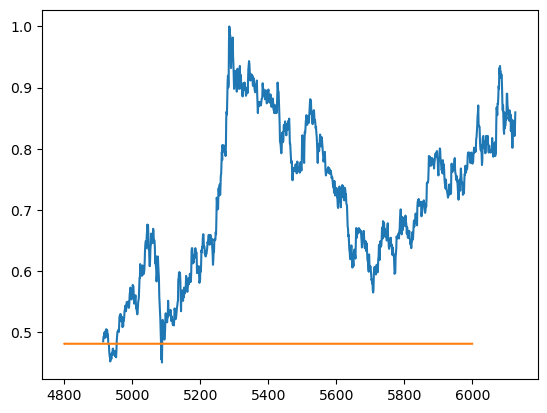

In [13]:
plt.plot(test['Close'], label = 'True')
plt.plot(forecast, label = 'Predicted')
plt.show()

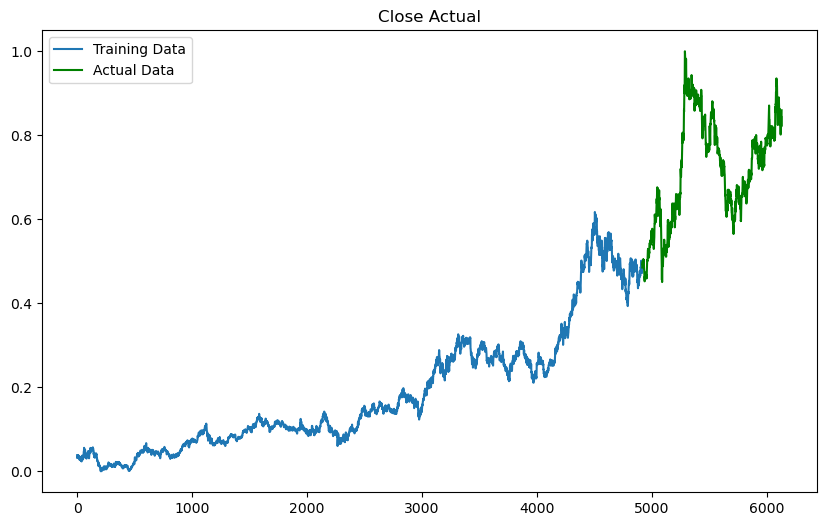

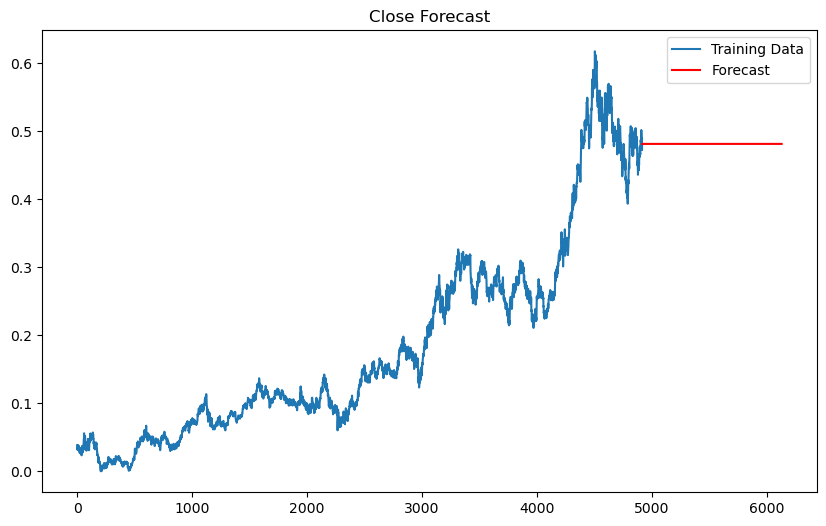

In [14]:
plt.figure(figsize=(10,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Data', color='green')
plt.title('Close Actual')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Close Forecast')
plt.legend()
plt.show()